In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv("IRIS.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
df.species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [8]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [9]:
df['species'] = df['species'].replace({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [11]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

In [38]:
#here is the list of all the values of the train data size in which we will be evaluating the losses
ts = np.arange(10,98,1)
ts

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94,
       95, 96, 97])

## Preparing the data to be plotted:

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

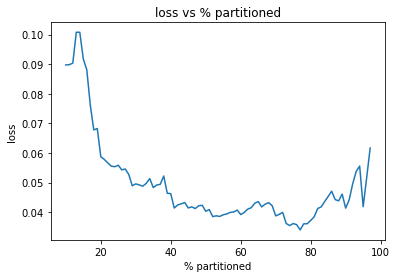

In [39]:
losses = []
for size in ts:
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=(100-size)/100,random_state=42)
    
    model = LinearRegression()
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    loss = mean_squared_error(y_test,y_pred)
    losses.append(loss)
    
plt.plot(ts, losses)
plt.xlabel('% partitioned')
plt.ylabel('loss')
plt.title('loss vs % partitioned')
plt.show()

In [40]:
min_loss = np.min(losses)
optimal_percentage = ts[np.argmin(losses)]
print('Optimal percentage: {}%'.format(optimal_percentage))
print('Minimum loss: {}'.format(min_loss))

Optimal percentage: 77%
Minimum loss: 0.034040285753021045


# Conclusion:

1. Plotted the graph between loss and % partitioned.
2. Optimal percentage: 77%
3. Minimum loss: 0.034040285753021045